# Levinson Durbin





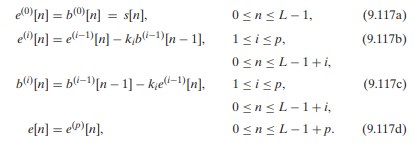

# kapa (PARCOR)

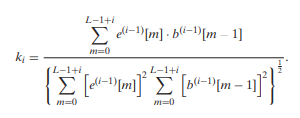

In [1]:
def levinson_durbin(input_data, order):
    
    e = np.zeros((order+1, len(input_data) + order))
    b = np.zeros((order+1, len(input_data) + order))
    
    kapa = np.zeros(order+1)
    
    e[0] = np.concatenate([input_data, np.zeros(order)])
    b[0] = np.concatenate([input_data, np.zeros(order)])
    
    for m in range(1, order+1):
        
        # get kapa
        x = np.concatenate([e[m-1, :len(input_data) + m]])
        y = np.concatenate([np.zeros(1), b[m-1, :len(input_data) + m-1]])

        k = np.dot(x, y) / (LA.norm(x) * LA.norm(y))
        kapa[m] = k
        
        # n = 0, n - 1 < 0 , b[n-1] = 0
        e[m, 0] = e[m-1, 0]
        b[m, 0] = -(kapa[m] * e[m-1, 0])
        
        # n >= 1
        e[m, 1:len(input_data) + m] = e[m-1, 1:len(input_data) + m] - (kapa[m] * b[m-1][:len(input_data) + m-1])
        b[m, 1:len(input_data) + m] = b[m-1, len(input_data) + m-1] - (kapa[m] * e[m-1,1:len(input_data) + m])

#     print('kapa :', kapa)
#     print('e[10] : ', e[10])
#     print('b[10] :' , b[10])
        
    return e, b, kapa
    

# All-pole Lattice filter

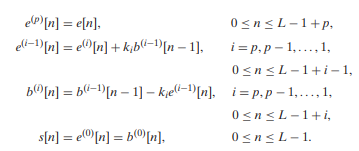

In [2]:
def lattice_filter(f, b, kapa, order, input_data):
    lattice_e = np.zeros((order+1, len(input_data) + order))
    lattice_b = np.zeros((order+1, len(input_data) + order))
    
    lattice_e[order] = f.copy()  # 초기값 설정
    lattice_b = b.copy()  # 초기값 설정


    for i in range(order, 0, -1):
        lattice_e[i-1,0] = lattice_e[i,0]
        lattice_b[i,:0] =  - (kapa[i] * lattice_e[i-1,0])
        
        lattice_e[i-1,1:len(input_data) + i] = lattice_e[i,1:len(input_data) + i] + (kapa[i] * lattice_b[i-1,:len(input_data) + i-1])
        lattice_b[i,1:len(input_data) + i] = lattice_b[i-1,len(input_data) + i-1] - (kapa[i] * lattice_e[i-1,1:len(input_data) + i])
    
    
    
#     print('e0', lattice_e[0])
#     print('b0', lattice_b[0])
    s = lattice_e[0][:-order]
    return s

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
import numpy.linalg as LA


path = r"./" # 경로
fname = r"speech1.wav" # 파일 이름

fs, data = wavfile.read(path + fname)

f = []
b = []
kapa = []

# levinson_durbin
f, b, kapa = levinson_durbin(data, 10)
wavfile.write("./f_10.wav", fs, f[10].astype(np.int16))

#lattice
s_n = lattice_filter(f[10], b, kapa, 10, data)
wavfile.write("./lattice.wav", fs, s_n.astype(np.int16))

# white_noise
white_noise= np.random.randint(low=0, high=5000, size=len(data) + 10 , dtype=np.int16)
wavfile.write("./white_noise.wav", fs, white_noise.astype(np.int16))

#white_noise_lattice
s_n = lattice_filter(white_noise, b, kapa, 10, data)
wavfile.write("./white_noise_lattice.wav", fs, s_n.astype(np.int16))

C:\Users\New\AppData\Local\Temp\ipykernel_10836\602014366.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(path + fname)
